In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
os.chdir('..')

# Concept Level with Layer Level

In [2]:
def plot_combined_models(resnext_layers, cvcl_layers, colors):

    
    num_layers = len(resnext_layers)
    assert len(cvcl_layers) == num_layers, "Both models must have the same number of layers"
    
    all_categories = set()
    
    for i, layer in enumerate(resnext_layers):
        df = pd.read_csv(layer)
        all_categories.update(df['category'].unique())
    
    for i, layer in enumerate(cvcl_layers):
        df = pd.read_csv(layer)
        all_categories.update(df['category'].unique())
    
    resnext_plot_data = {category: [0] * num_layers for category in all_categories}
    cvcl_plot_data = {category: [0] * num_layers for category in all_categories}
    
    for i, layer in enumerate(resnext_layers):
        df = pd.read_csv(layer)
        category_count = df.groupby('category')['label'].nunique()
        
        for category in all_categories:
            if category in category_count:
                resnext_plot_data[category][i] = category_count[category]
    
    for i, layer in enumerate(cvcl_layers):
        df = pd.read_csv(layer)
        category_count = df.groupby('category')['label'].nunique()
        
        for category in all_categories:
            if category in category_count:
                cvcl_plot_data[category][i] = category_count[category]
    
    x_labels = [f'layer{i+1}' for i in range(num_layers)]
    
    max_y_value = max(
        max(max(values) for values in resnext_plot_data.values()),
        max(max(values) for values in cvcl_plot_data.values())
    )
    max_y_value = ((max_y_value // 10) + 1) * 10
    
    fig, axes = plt.subplots(1, 2, figsize=(7.5, 4), sharey=True)
    
    for category, data in resnext_plot_data.items():
        axes[0].plot(x_labels, data, marker='o', markerfacecolor='none', 
                    color=colors[category], linestyle='--', dashes=(5, 2), linewidth=1.5)
    
    for category, data in cvcl_plot_data.items():
        axes[1].plot(x_labels, data, marker='o', markerfacecolor='none', 
                    color=colors[category], linestyle='--', dashes=(5, 2), linewidth=1.5)
    
    axes[0].set_title('ResNeXt (ImageNet pre-trained)', fontsize=11)
    axes[1].set_title('CVCL-ResNeXt (infant data pre-trained)', fontsize=11)
    
    axes[0].set_ylabel('Number of Unique Detectors', fontsize=10)
    
    axes[0].set_ylim(0, max_y_value)
    axes[1].set_ylim(0, max_y_value)
    
    axes[0].grid(True, linestyle='--', axis='y', alpha=0.7)
    axes[1].grid(True, linestyle='--', axis='y', alpha=0.7)
    
    legend_handles = [Line2D([0], [0], marker='o', markerfacecolor='none', 
                     color=colors[cat], linestyle='--', dashes=(5, 2), label=cat) 
                     for cat in all_categories]
    
    fig.legend(handles=legend_handles, title='Category', 
              loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(all_categories))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    plt.show()
    
    return fig, axes

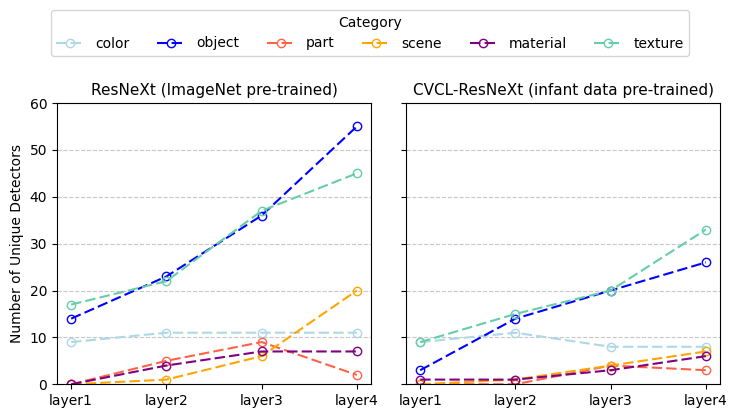

In [3]:
num_layers = 4
resnext_layers = [f"experiments/neuron_labeling/net_dissect_results/resnext/tally_{i}.csv" for i in range(num_layers)]
cvcl_layers = [f"experiments/neuron_labeling/net_dissect_results/cvcl/tally_{i}.csv" for i in range(num_layers)]

colors = {
    'object': 'blue',
    'part': 'tomato',
    'scene': '#FFA500', 
    'material': 'purple',
    'texture': 'mediumaquamarine',  
    'color': '#ADD8E6' 
}

fig, axes = plot_combined_models(resnext_layers, cvcl_layers, colors)